In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import product
from sklearn.linear_model import LinearRegression 

%matplotlib inline

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=1.5)

DATA_DIR = Path('../data')

# Load Data Matrices

In [87]:
# Load normalised data
# Shape of the data is (number of samples)x(number of lobes)

X = np.load(DATA_DIR / "X-siju.npy")
Y = np.load(DATA_DIR / "Y-hije.npy")

print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {Y.shape}')

Shape of X: (450, 15)
Shape of Y: (450, 15)


In [14]:
lobes = np.array(["alpha'1", "alpha'2", "alpha'3", 'alpha1', 'alpha2', 'alpha3',
       "beta'1", "beta'2", 'beta1', 'beta2', 'gamma1', 'gamma2', 'gamma3',
       'gamma4', 'gamma5'])

# Fit (one-to-one)

This is the canonical model being fit with expanded data. This set of expanded data was generated using every possible combination of DAN input and MBON output for each stimulus.

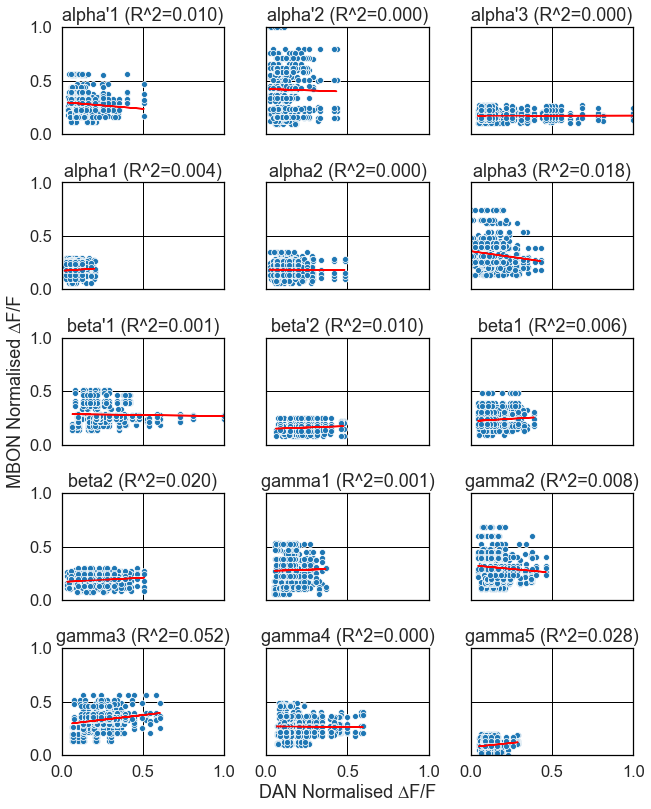

In [17]:
model_parameters = {}
score_dict = {}

fig, axes = plt.subplots(5, 3, figsize=(10,12), sharex='all', sharey='all')
# fig.suptitle('DAN vs MBON activity Model using Linear Regression')

for i, lobe in enumerate(lobes):
    
    x = X[:, i]
    y = Y[:, i]
    
    xT = x.reshape((-1,1))
    model = LinearRegression(fit_intercept=True).fit(xT, y)
    score = model.score(xT, y)

    score_dict[lobe] = score
    
    model_parameters[lobe] = {
        'm': model.coef_,
        'c': model.intercept_,
        'r2': score
    }
    
    ax = axes[int(i/3), i%3]
    ax.set_title(f'{lobe} (R^2={score:.3f})')
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    
    ax.plot(xT, model.predict(xT), 'r')
    sns.scatterplot(
        x = x,
        y = y,
        ax=ax
    )

# Add common axis labels
fig.add_subplot(111, frameon=False)  
plt.grid(False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('DAN Normalised ∆F/F')
plt.ylabel('MBON Normalised ∆F/F')
    
plt.tight_layout()

In [28]:
print(f'Mean score: {np.mean(list(score_dict.values()))}')

Mean score: 0.010621562226741932


In [38]:
import json
SCORE_DIR = Path('../scores')

with open( SCORE_DIR / 'canonical_linear_model-cross_product_data.json', "w") as score_file:
    json.dump(score_dict, score_file, indent='\t')

# Check the scores man

In [82]:
with open( SCORE_DIR / 'canonical_linear_model-cross_product_data.json', "r") as score_file:
    score_canonical = json.load(score_file)

with open( SCORE_DIR / 'crossed_linear_model-cross_product_data.json', "r") as score_file:
    score_crossed = json.load(score_file)

In [83]:
score_df = pd.concat(
    [pd.Series(score_canonical, name='canonical score'), 
    pd.Series(score_crossed, name='crossed score') ],
    axis=1
)

score_df

,canonical score,crossed score
alpha'1,0.009949,0.189136
alpha'2,0.000342,0.084409
alpha'3,0.000126,0.116188
alpha1,0.004465,0.103048
alpha2,0.000013,0.113115
alpha3,0.017979,0.103084
beta'1,0.001040,0.254539
beta'2,0.010329,0.056838
beta1,0.006372,0.101796
beta2,0.019578,0.071103


In [84]:
# Basic stats
score_df.describe()

,canonical score,crossed score
count,15.000000,15.000000
mean,0.010622,0.132131
std,0.014240,0.053775
min,0.000013,0.056838
25%,0.000514,0.102422
50%,0.006372,0.113115
75%,0.014154,0.175102
max,0.051910,0.254539


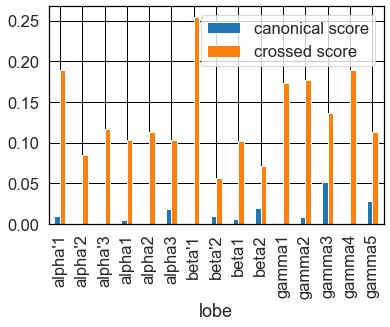

In [85]:
# Visual comparison

score_df["lobe"] = score_df.index
score_df.plot(x="lobe", y=["canonical score", "crossed score"], kind="bar")